<a href="https://ibb.co/YPyZNgB"><img src="https://i.ibb.co/sb6Hg79/unnamed.jpg" alt="unnamed" border="0"></a>

# Team members: # 
**Abdulrahman Alghamdi**

**Ahmed Kabli** 

**Azzam Alhussain**

We utilized the **official YOLOv5 🚀 notebook** by **Ultralytics**, which is freely available for commercial use and redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 

For more information please visit https://github.com/ultralytics/yolov5 and https://ultralytics.com. Thank you!



To train our detector we take the following steps:

1. Install YOLOv5 and its dependencies
2. Import dataset
3. Run YOLOv5 training
4. Evaluate and Visualize YOLOv5 performance on the dataset
5. Run YOLOv5 inference on couple of selection sources
6. Convert to ONNX and Export YOLOv5 weights (brain) to the cloud for future inference

# 1. Setup

`Clone Yolov5`, install dependencies and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone YOLOv5
%cd yolov5
%pip install -qr requirements.txt 

import torch
import utils
display = utils.notebook_init()  # checks Cuda version, CPU and GPU available, RAM, Disk

YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (A100-SXM4-40GB, 40536MiB)


Setup complete ✅ (12 CPUs, 83.5 GB RAM, 23.5/166.8 GB disk)


# 2. Import dataset

Upload or mount Google drive to bring your custom dataset **(KSA Visual Pollution dataset)**. Get the well prepared data from this lik: https://drive.google.com/file/d/1_PF_JeAngh0PlW2gkNDuXfvjm9RMVKRM/view?usp=sharing 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q /content/drive/MyDrive/inferance_images.zip -d ../ # go to your drive and copy the data path to unzip your dataset to be used for training testing 

# 3. Train Custom YOLOv5 Detector

Select a pretrained model to start training from. 
<a href='https://postimg.cc/XZDPxH9S' target='_blank'><img src='https://i.postimg.cc/k4ndJL44/model-comparison.png' border='0' alt='model-comparison'/></a>
### Next, we'll fire off training!

Here, we are able to pass a number of arguments:
- **img:** define input image size of the dataset
- **batch:** determine batch size based on memory available from GPU (goes form 8,16,32,40,64,128)
- **epochs:** define the number of training epochs. (Note: often, 50-100 are common here for RGB images of 5-8K images!)
- **data:** set the path to our yaml file (Go yo yolov5/data and then edit and upload the SDAIA.ymal to this path). Use this link to get the required ymal file: https://drive.google.com/file/d/1lImKgxuB2ziERF6txLtM-P1ec7ochwdO/view?usp=sharing 
- **cfg:** specify our model configuration if we are training from scratch (sometimes not recommended - no transfer learning)
- **weights:** specify a custom path to weights (brain of model of our AI algorithm)
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

In [ ]:
# Train YOLOv5x on KSA visual pollution classes for 100 epochs
!python train.py --img 640 --batch 32 --epochs 60 --data /content/yolov5/data/SDAIA.yaml --weights yolov5x.pt --hyp hyp.scratch-high.yaml --cache 

train: weights=yolov5x.pt, cfg=, data=/content/yolov5/data/SDAIA.yaml, hyp=hyp.scratch-high.yaml, epochs=42, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (A100-SXM4-40GB, 40536MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=0.7, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.

# 4. Evaluate and Visualize Custom YOLOv5 Detector Performance

Training losses and performance metrics are saved to Tensorboard and also to a logfile defined above with the --name flag when we train. In our case, we named this yolov5s_results. (If given no name, it defaults to results.txt.) The results file is plotted as a png after training completes.

Note from Glenn: Partially completed results.txt files can be plotted with from utils.utils import plot_results; plot_results().

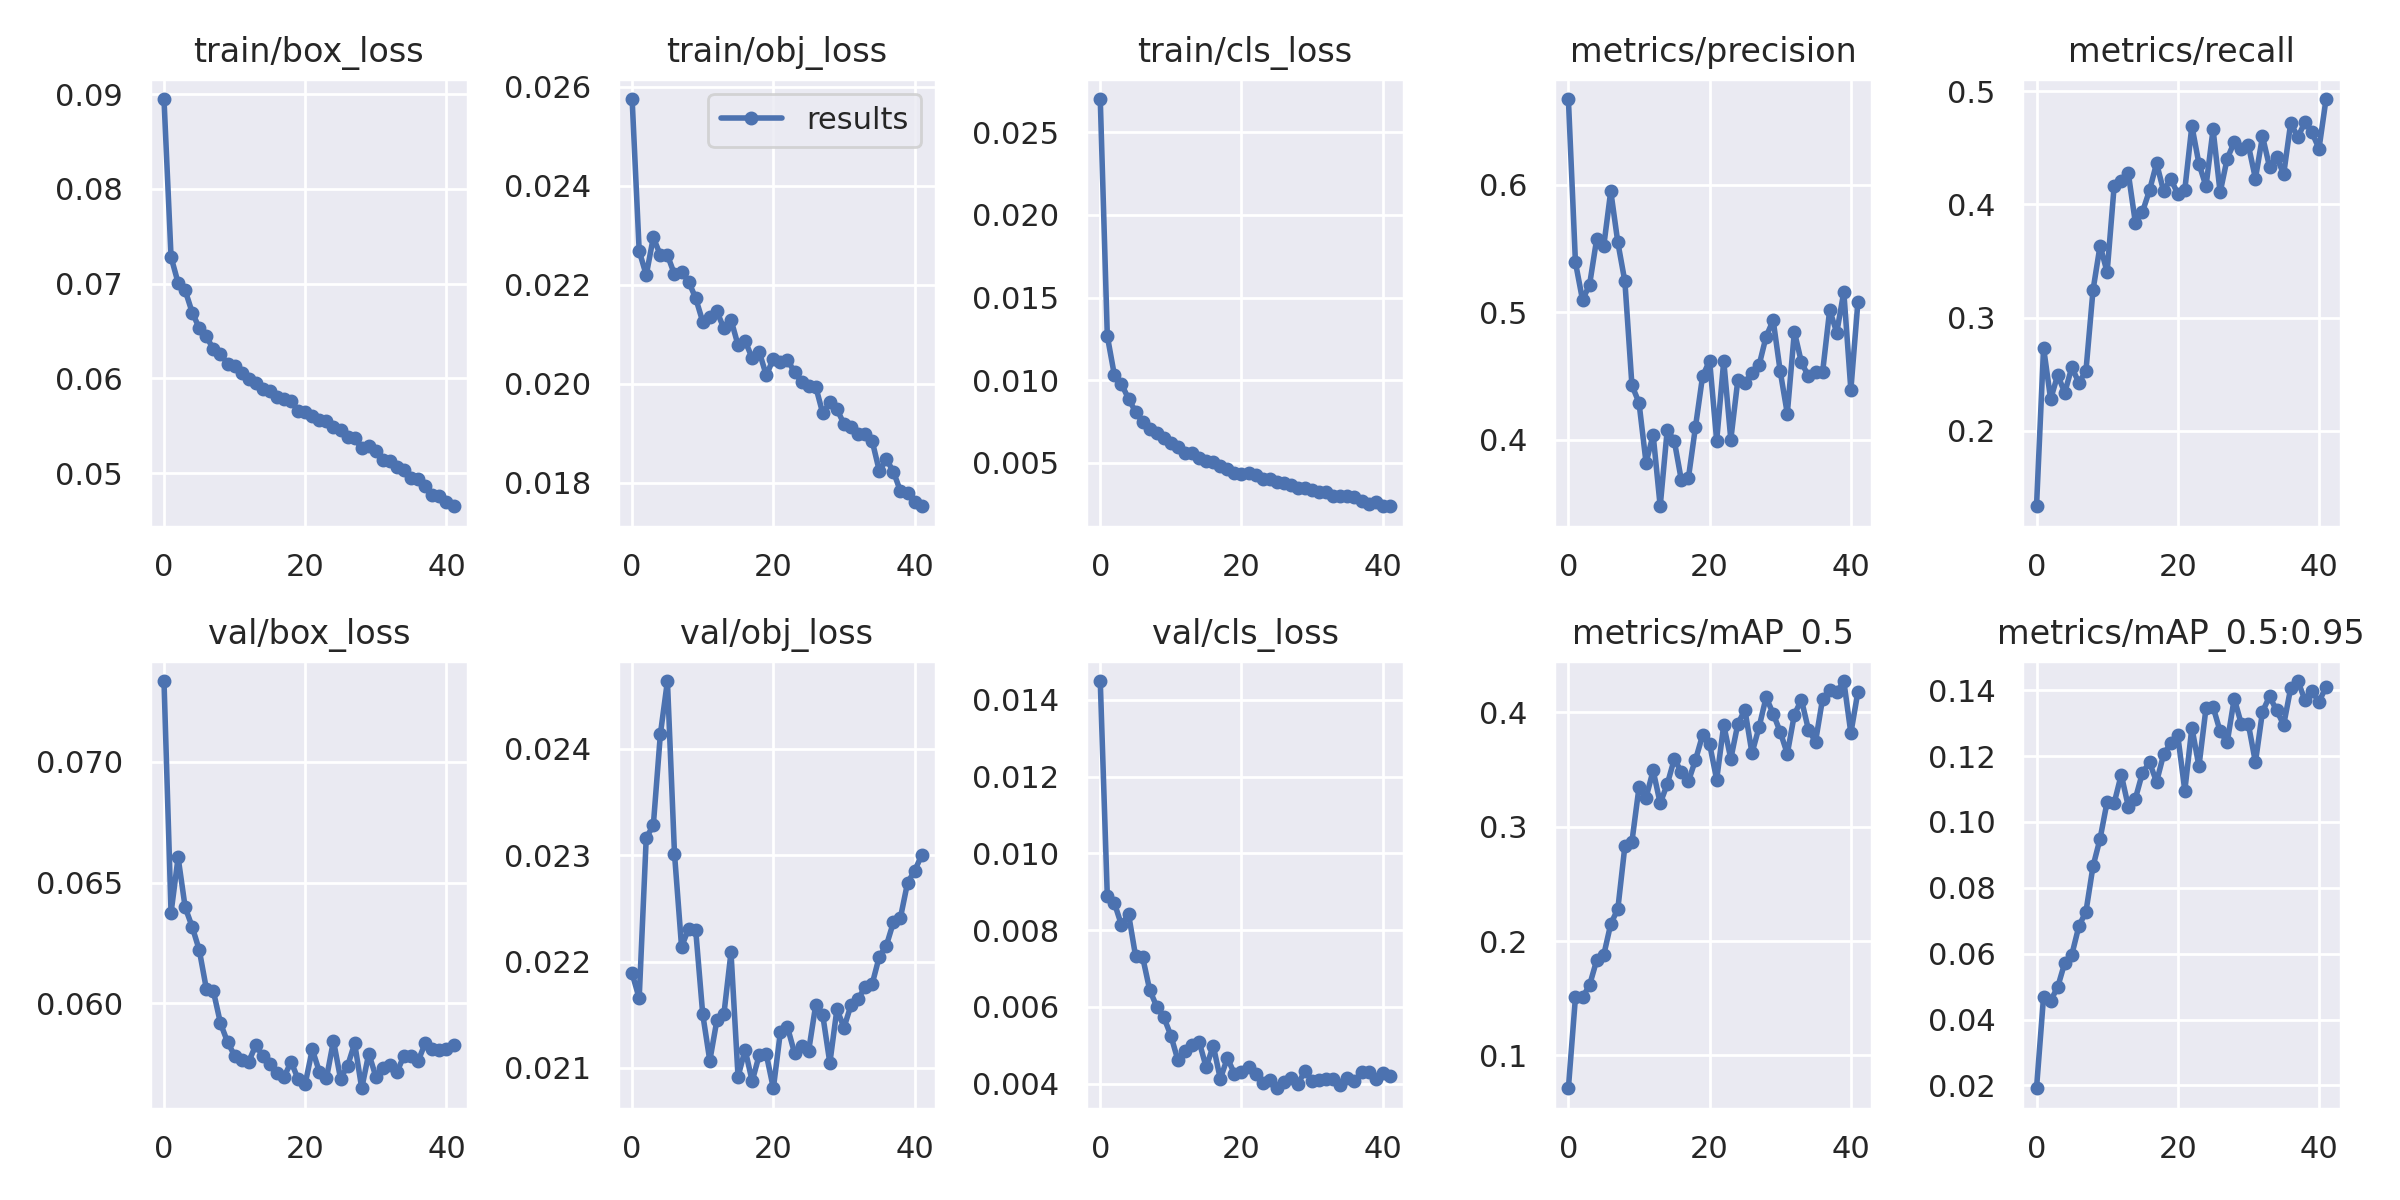

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from IPython.display import Image, clear_output  # to display images
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/exp/results.png', width=1000)  # view results.png

### Curious? Visualize Our Training Data with Labels

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects.

GROUND TRUTH TRAINING DATA:


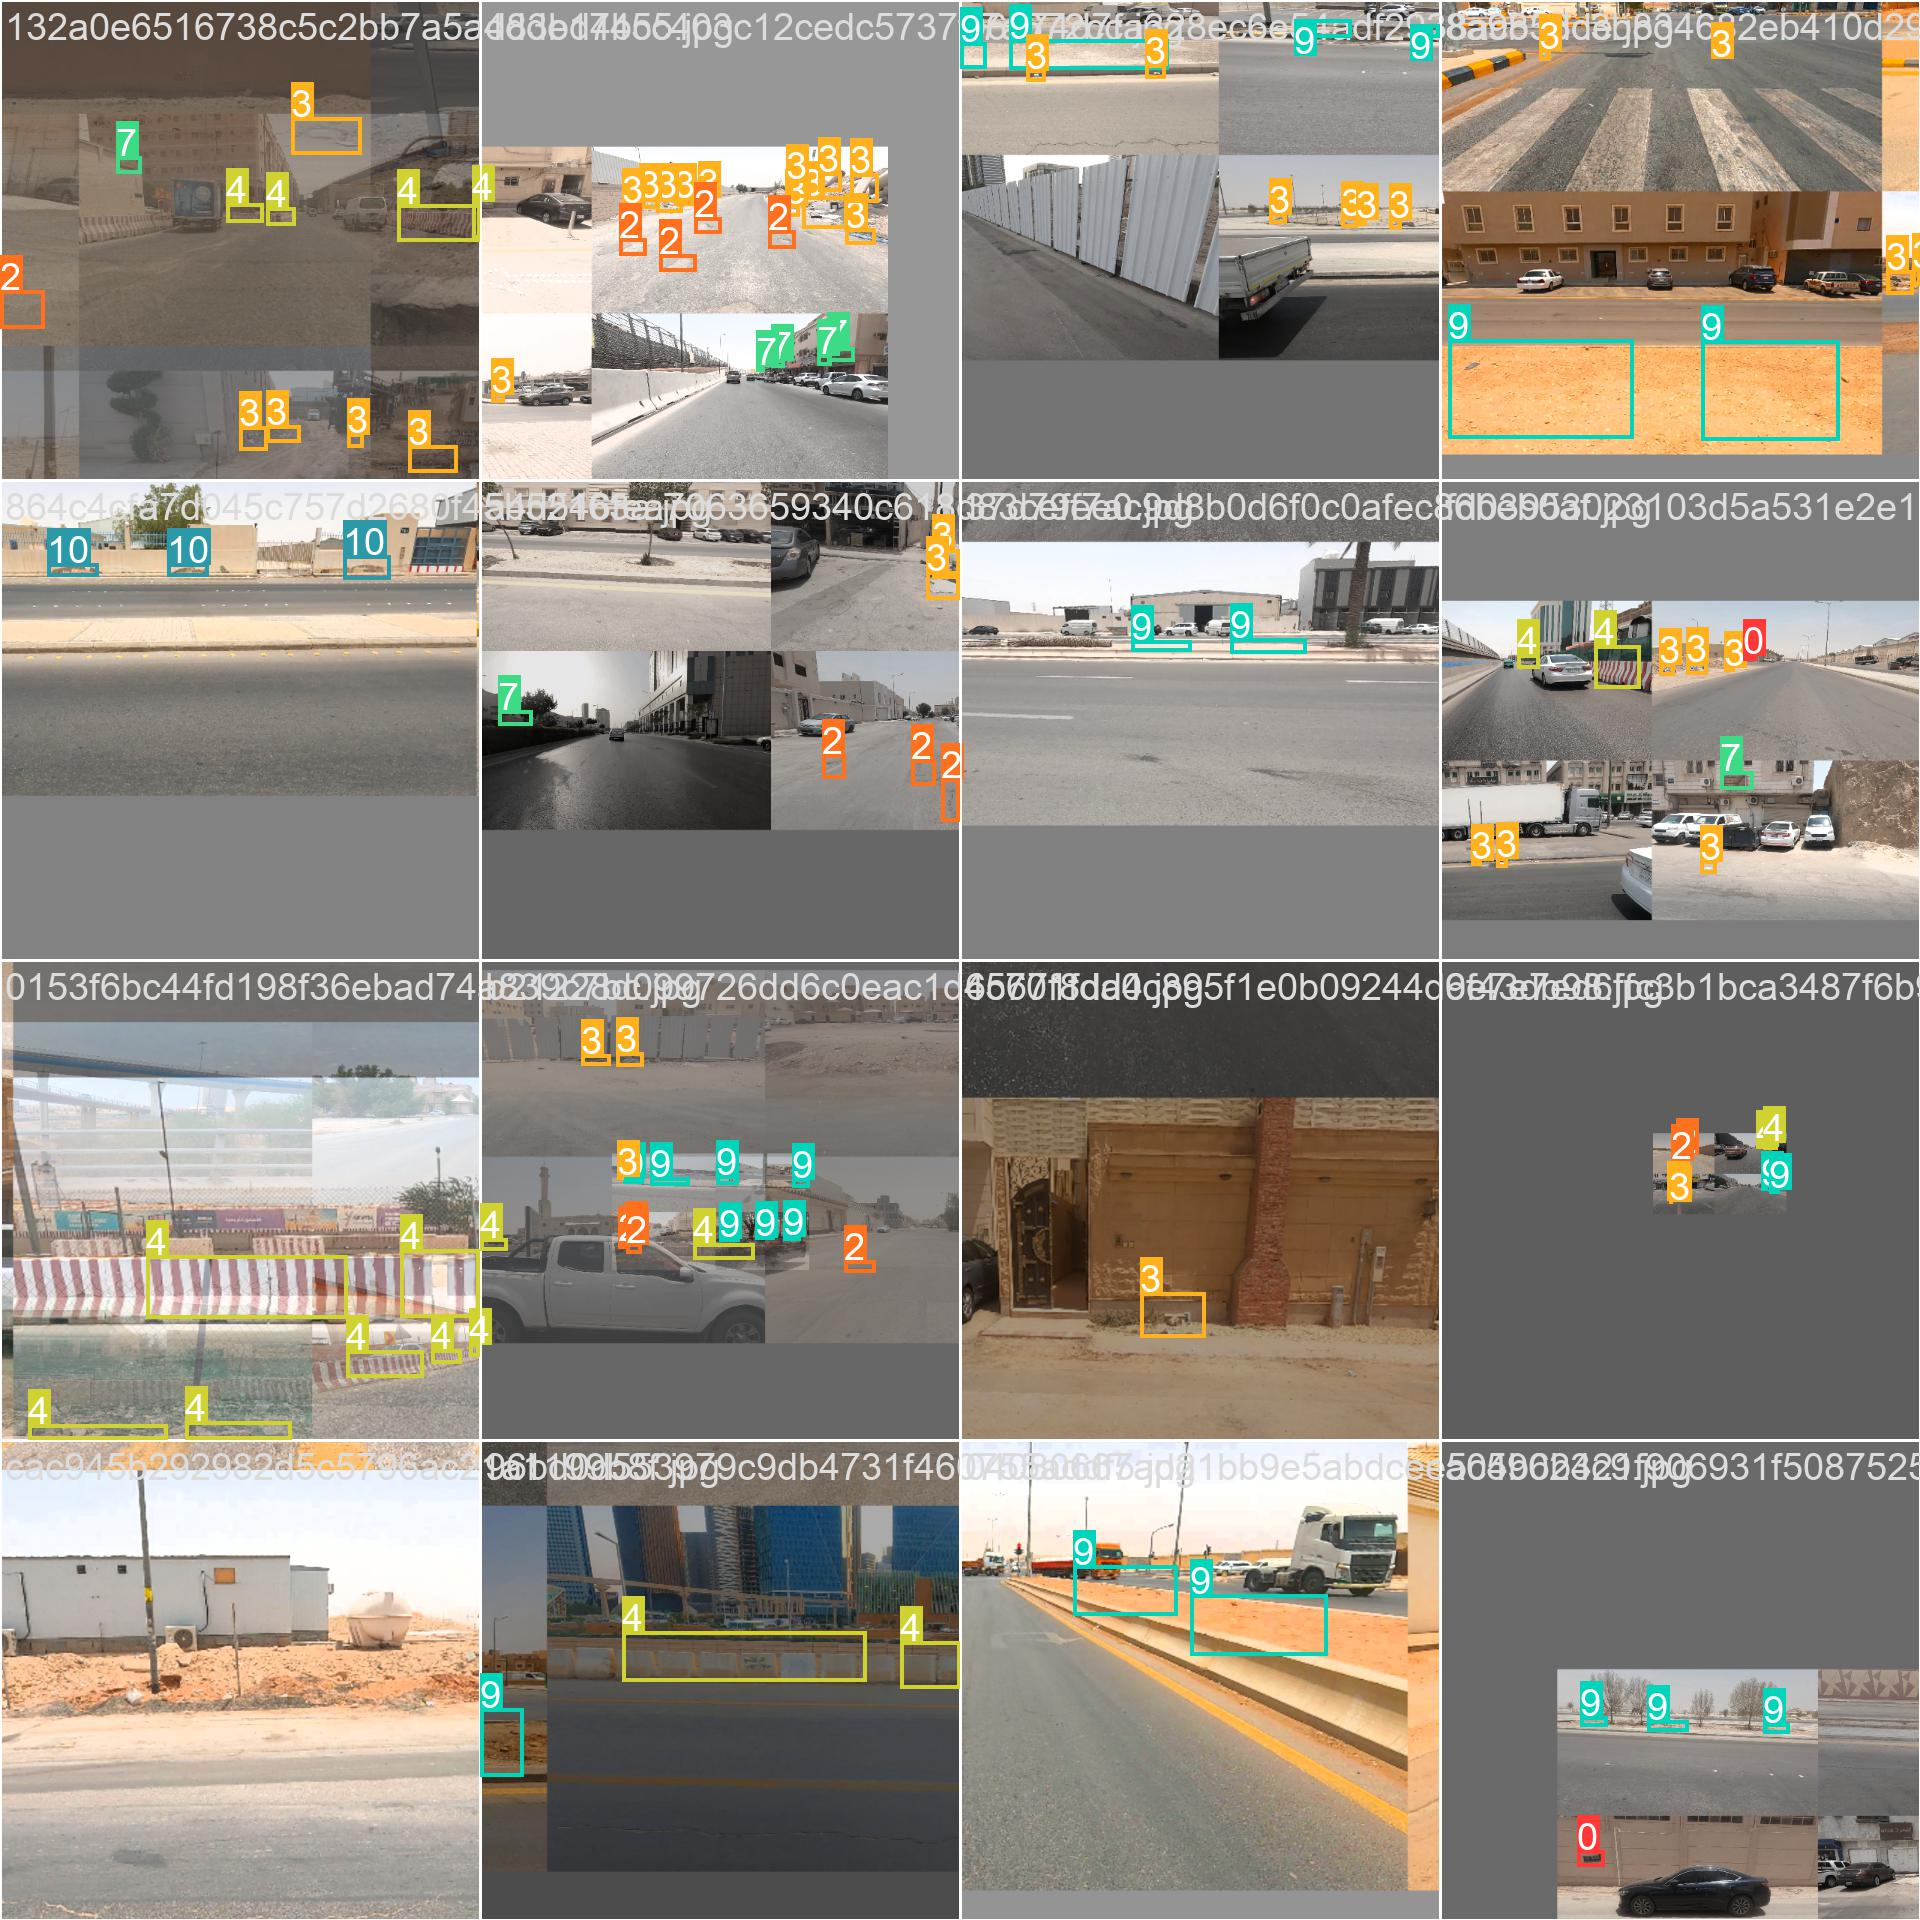

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/exp/train_batch0.jpg', width=1400)

GROUND TRUTH AUGMENTED TRAINING DATA:


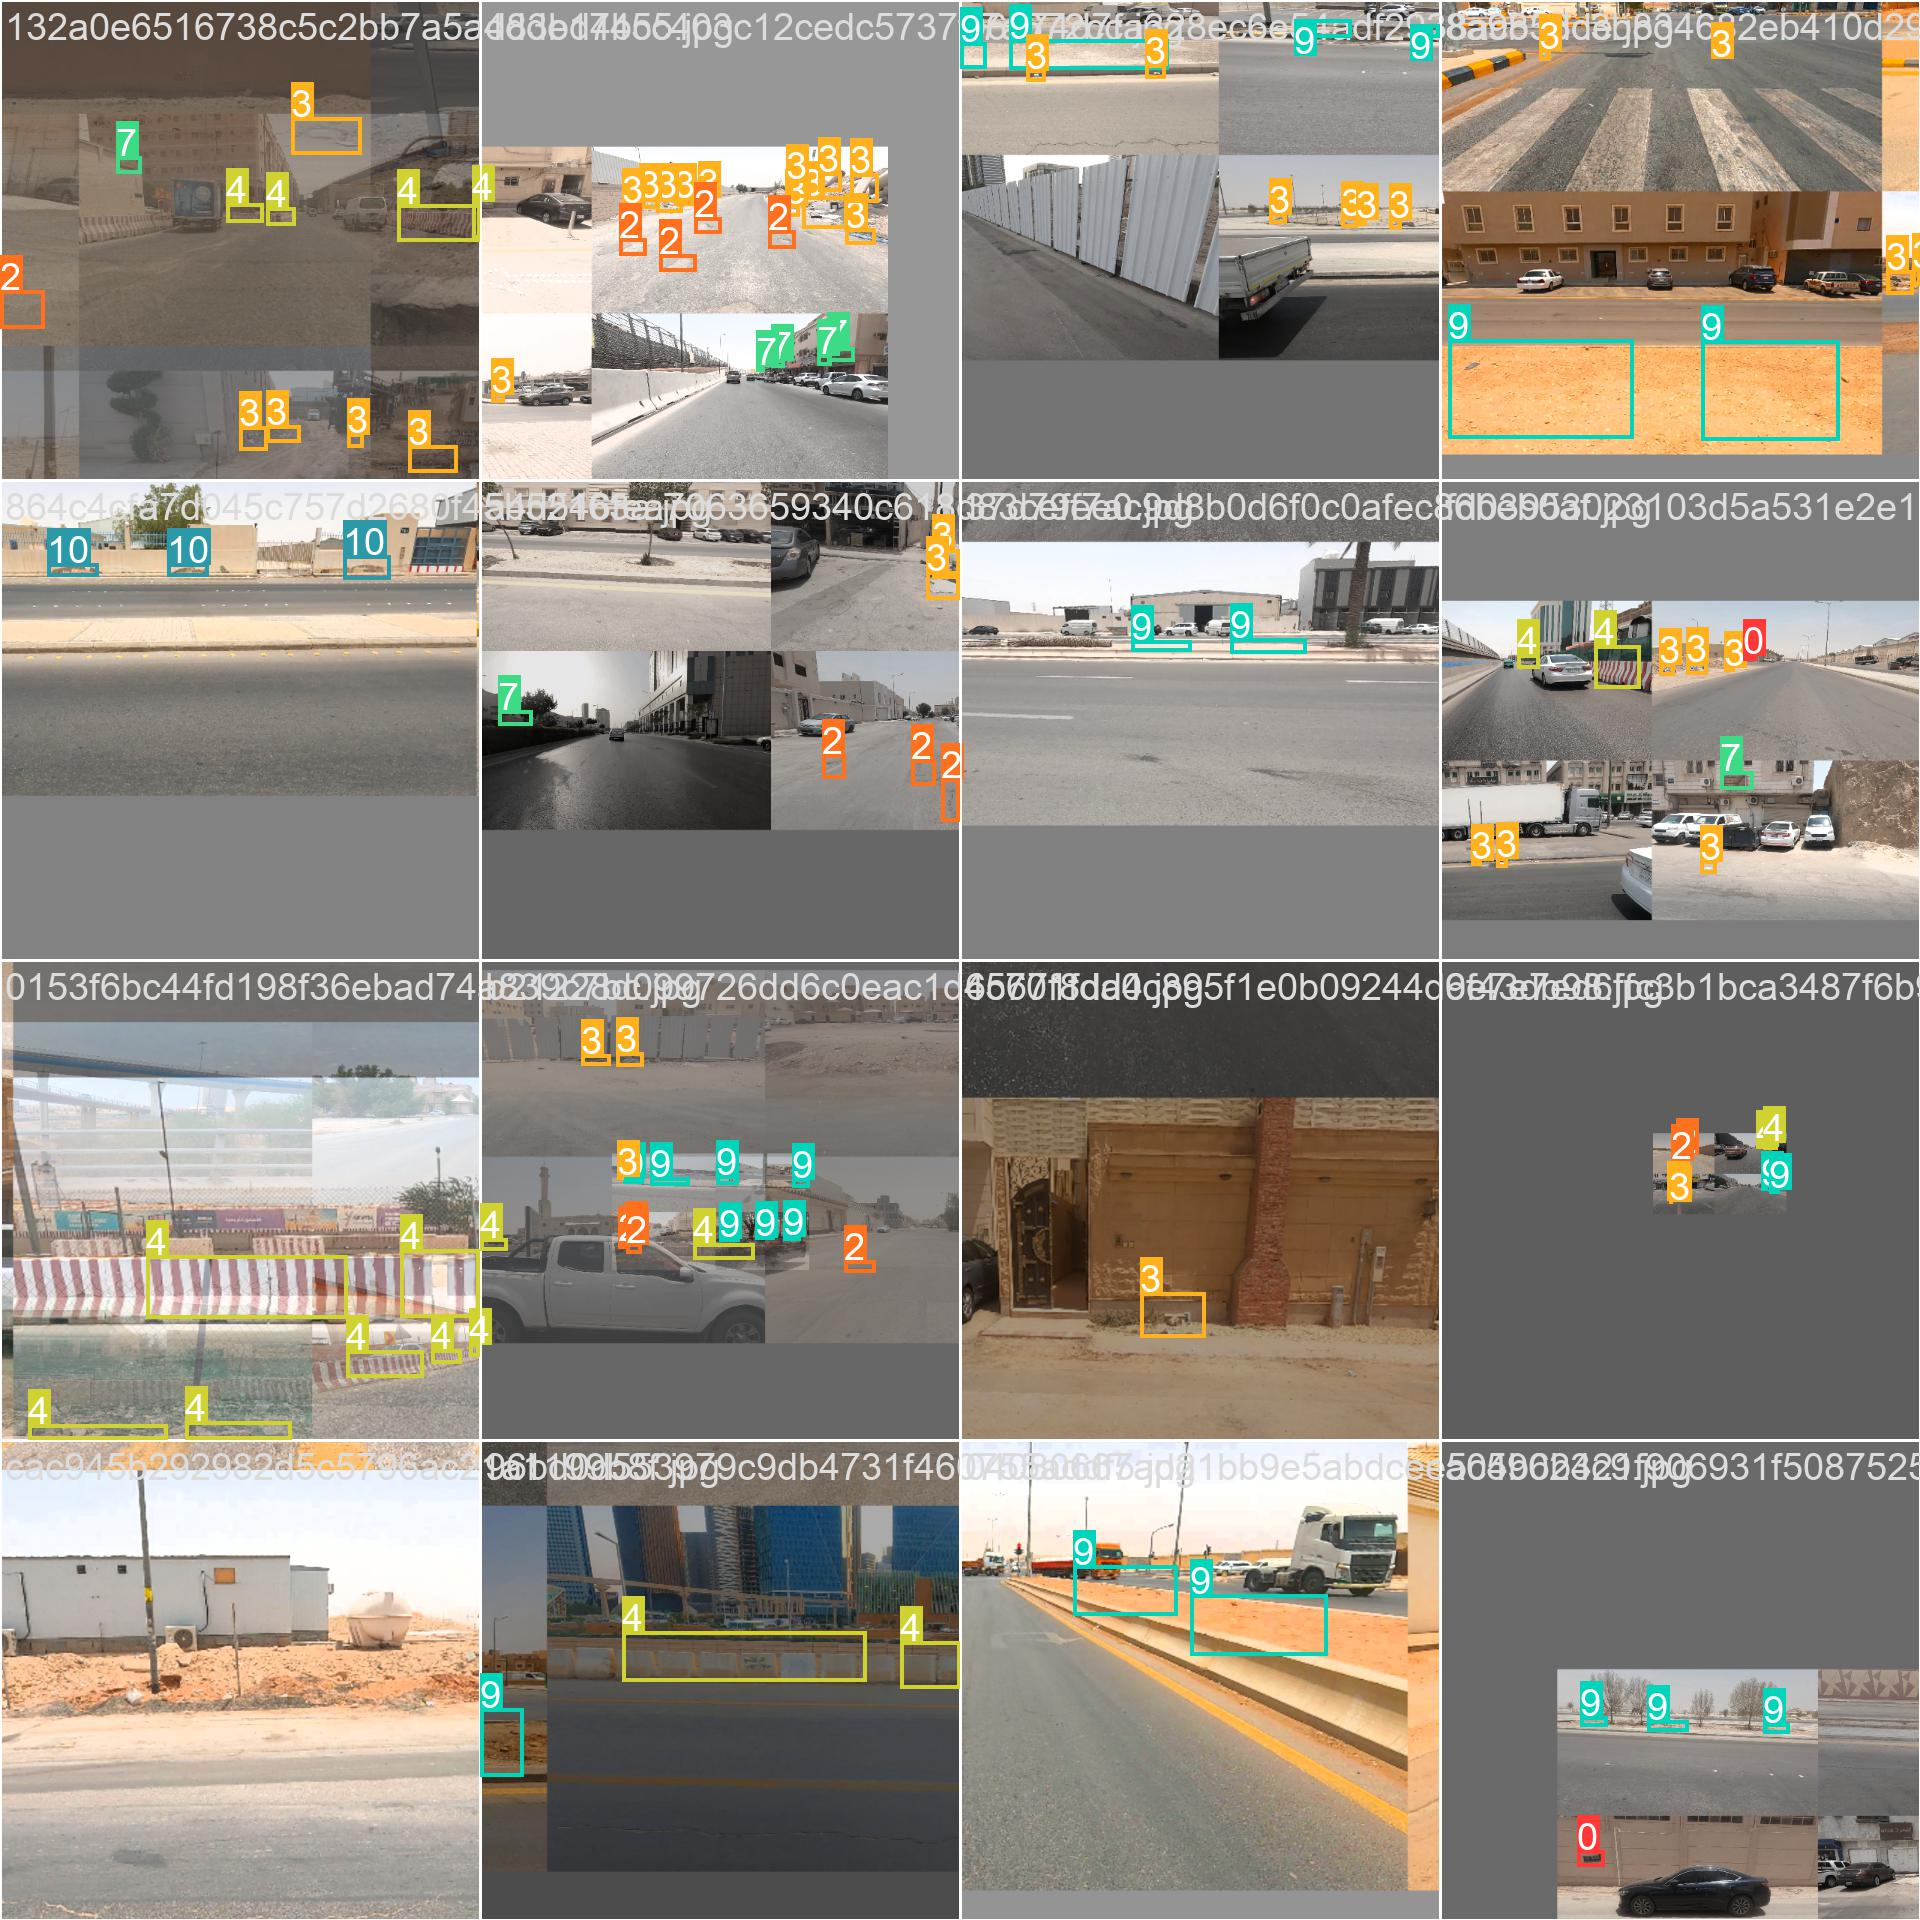

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/exp/train_batch0.jpg', width=1400)

# 5. Inference

`detect.py` runs YOLOv5 inference on a variety of sources. Here we detect using the test images from the KSA Visual Pollution dataset that was given without the coordinates. Use this link to get the **test images**: https://drive.google.com/file/d/1cycWWo6rUMJcIQbHC4m9rQdTLPZRoHN-/view?usp=sharing 

Since we mount our drive, we just need to unzip them and run our model for detection.To run a test, get our **model** using this link: https://drive.google.com/file/d/1srn-uJHbiYDhz6bwpJpBC-iKkDb8SAE3/view?usp=sharing 


Then, we save the result with the coordinates to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/last_SDAIA_1.pt --img 640 --conf 0.25 --save-txt --source "/content/test" #‏

detect: weights=['/content/yolov5/runs/train/exp/weights/last_SDAIA_1.pt'], source=/content/inferance_images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (A100-SXM4-40GB, 40536MiB)

Fusing layers... 
Model summary: 322 layers, 86240704 parameters, 0 gradients, 204.0 GFLOPs
image 1/2092 /content/inferance_images/006e04a34f54d116f6aff2bb31cb320c.jpg: 384x640 1 GARBAGE, 25.9ms
image 2/2092 /content/inferance_images/006e70d6a51af3e670bbe712a83aa1c5.jpg: 384x640 1 POTHOLES, 2 GARBAGEs, 20.8ms
image 3/2092 /content/inferance_images/0081b25823f23a536c9f1952491db636.jpg: 384x640 2 GARB

# 6. Convert best.pt into ONNX format, and then Import or export the weights from cloud 

In [ ]:
!python export.py --weights /content/YOLOv5x_16_34_973.pt --include onnx # If you wish to deploy your model, first convert it into onnx

In [ ]:
%cp /content/yolov5/runs/train/exp/weights/last_SDAIA_1.pt /content/drive/My\ Drive # save your .pt or .onnx models into your drive 

In [ ]:
import shutil
shutil.copytree("/content/yolov5/runs/detect/exp4/labels","/content/drive/My Drive/label_A5.zip") # save the coordinates into your drive 

'/content/drive/My Drive/label_A5.zip'

In [ ]:
%cp /content/drive/My\ Drive/best.pt /content/ # mount your .pt or .onnx models to your training environment 
